# Data Preanalysis for Clustering

This tutorial show how to analyse trajectory data. The aim in this tutorial is, to find repeatingly occuring behaviour in the trajectory. This prototypical behaviour can be obtained by clustering the trajectory data. This idea is inspired by Braun et al.'s paper "Identifying Prototypical Components in Behaviour Using Clustering Algorithms"
If you wish to have more details about the idea, please refer to this paper.


As we use the k-mean algorithm to cluster the the data. This algorithm need can not decide in how many clusters the data should be clustered. Therefore we need to find out the number of clusters k before we can cluster the data.
Since the trajectory data we are dealing with is usually noisy and to make it easier for the clusterer, we prepare the data first to obtain optimal results.

## Steps to be performed
The following steps are performed to obtain the different prototypical behaviours
1. Preprocessing
   * Smoothening of the data, to reduce noise
   * calculate the velocities of data the pure location/rotational data
   * perform pca, to find relevant dimensions
   we treat locational and rotational information seperated here and therefore perform two pcas
   * Rescale the data, so that it is normalized between the values of 0 and 1.
2. Find optimal number of clusters k
   * Calculate the cost for each number of clusters
   * Check, how the costs change when adding another cluster (difference of costs)
   * Use the previous steps to reduce the possible range of clusters
   * within the new cluster range, calculate cluster instability
   * within the new cluster range, calculate cluster quality
   * use all information calculated above to make a decision on k
       

Since the trajectory module of the navipy toolbox, already provides many of the necessary feature,
we first load the data into a trajectory object. Notice that here the data was provided as a csv file.

In [1]:
from navipy.trajectories import Trajectory
import pandas as pd

fname = '/media/luiza/Daten/Repos/tmpnavibox/toolbox-navigation/navipy/resources/sample_experiment/body_traj.hdf'
reread = pd.read_hdf(fname)
#reread.head()
mytraj = Trajectory()
mytraj.from_dataframe(reread,'zyx')
#mytraj.loc[:,('zyx','alpha_1')]=0
#mytraj.loc[:,('zyx','alpha_2')]=0


location                             zyx                    
              x          y          z   alpha_0   alpha_1   alpha_2
0           NaN        NaN        NaN       NaN       NaN       NaN
1           NaN        NaN        NaN       NaN       NaN       NaN
2           NaN        NaN        NaN       NaN       NaN       NaN
3           NaN        NaN        NaN       NaN       NaN       NaN
4           NaN        NaN        NaN       NaN       NaN       NaN
5           NaN        NaN        NaN       NaN       NaN       NaN
6           NaN        NaN        NaN       NaN       NaN       NaN
7           NaN        NaN        NaN       NaN       NaN       NaN
8           NaN        NaN        NaN       NaN       NaN       NaN
9           NaN        NaN        NaN       NaN       NaN       NaN
10          NaN        NaN        NaN       NaN       NaN       NaN
11          NaN        NaN        NaN       NaN       NaN       NaN
12          NaN        NaN        NaN       NaN       NaN       NaN
13          NaN        NaN        NaN       NaN       NaN       NaN
14          NaN        NaN        NaN       NaN       NaN       NaN
15          NaN        NaN        NaN       NaN       NaN       NaN
16          NaN        NaN        NaN       NaN       NaN       NaN
17          NaN        NaN        NaN       NaN       NaN       NaN
18          NaN        NaN        NaN       NaN       NaN       NaN
19          NaN        NaN        NaN       NaN       NaN       NaN
20          NaN        NaN        NaN       NaN       NaN       NaN
21          NaN        NaN        NaN       NaN       NaN       NaN
22          NaN        NaN        NaN       NaN       NaN       NaN
23          NaN        NaN        NaN       NaN       NaN       NaN
24          NaN        NaN        NaN       NaN       NaN       NaN
25          NaN        NaN        NaN       NaN       NaN       NaN
26          NaN        NaN        NaN       NaN       NaN       NaN
27          NaN        NaN        NaN       NaN       NaN       NaN
28          NaN        NaN        NaN       NaN       NaN       NaN
29          NaN        NaN        NaN       NaN       NaN       NaN
...         ...        ...        ...       ...       ...       ...
4971 -63.146299  18.357971  59.822700  0.967006  0.458324  0.058865
4972 -62.834838  18.243856  59.934105  0.977959  0.429060  0.038489
4973 -62.586160  18.103241  60.009031  0.934529  0.457434  0.121039
4974 -62.356966  18.082375  60.185486  0.920048  0.431195  0.068946
4975 -62.032337  18.059370  60.417889  0.963071  0.420558  0.057091
4976 -61.737946  17.950516  60.517335  0.921725  0.449414  0.030928
4977 -61.384759  17.917382  60.708134  0.911549  0.467578  0.069127
4978 -61.100737  17.788102  60.854002  0.932223  0.402517  0.045109
4979 -60.884108  17.787884  61.107080  0.864488  0.425602  0.058924
4980 -60.558112  17.777185  61.317017  0.902933  0.445068  0.055863
4981 -60.200097  17.636296  61.417948  0.874890  0.422932  0.037635
4982 -59.971791  17.616747  61.593158  0.856787  0.454523  0.015463
4983 -59.648312  17.569455  61.665839  0.845941  0.371065  0.048933
4984 -59.290095  17.424019  61.809013  0.825531  0.412623  0.028566
4985 -59.029087  17.345446  61.888640  0.891722  0.393420  0.013077
4986 -58.741028  17.315703  61.961261  0.855726  0.416191 -0.016122
4987 -58.358914  17.175984  62.092787  0.809688  0.403949  0.019532
4988 -58.122083  17.130793  62.170048  0.822855  0.368998  0.027706
4989 -57.826004  17.068114  62.276496  0.823605  0.350064  0.026930
4990 -57.483031  16.967885  62.305175  0.782393  0.353635 -0.027790
4991 -57.192812  16.949480  62.356962  0.794794  0.346539 -0.049301
4992 -56.805833  16.870497  62.431697  0.795053  0.342007  0.009630
4993 -56.444285  16.781750  62.408632  0.799395  0.326721  0.007297
4994 -56.240725  16.731563  62.437491  0.818357  0.318915 -0.047343
4995 -55.950965  16.675305  62.503840  0.794826  0.331530 -0.036219
4996 -55.589513  16.586469  62.480748  0.755028  0.342729 -0.05

In [ ]:
print(mytraj.head())

In [ ]:
from scipy import signal
import numpy as np

def filter_traj(trajs,lamb=250):
    filteredtrajs=[]
    for mytraj in trajs:
        filteredtraj=Trajectory().from_dataframe(mytraj.copy())
        myblocks=mytraj.consecutive_blocks()
        for b in myblocks:
            for c in b.columns:
                tmpdata = b.loc[:,c].values.copy()
                if not 'location' in c:
                    tmpdata=np.unwrap(tmpdata)   
                filteredtraj.loc[b.index,c]=signal.cspline1d(tmpdata,lamb)
        filteredtrajs.append(filteredtraj)
    return filteredtrajs

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
tmptraj=Trajectory().from_dataframe(mytraj.dropna())
plt.plot(tmptraj.velocity()['dalpha_0'])
plt.show()

As one can see, do we have a lot of Nans now. That is no problem as the preprocessing function handels nans byitself. It uses the Trajectory functions to remove them.

Now the next steps are the preprocessing. This can be done with the preprocessing module of the navipy toolbox, it includes a butterworth filter and a pca transformation.
The function returns a table that contains the processed data.

Note that this function lets you choose on which columns of the trajectory a pca should be applied and to how many components it should be reduced. In default, the locational (x,y,z) and the rotational (alpha, beta, gamma) information are treated independent and no data dimension is performed but only a pca is performed for three components each. So one pca is performed on x,y,z and one on alpha_0, alpha_1, alpha_2

In [2]:
from navipy.preanalysis.preprocessing import preprocessing

X_std, transformed = preprocessing([mytraj],lamb=250)
transformed=transformed[0]
X_std=pd.concat([X_std[0],X_std[1]],axis=1, sort=False)

In [ ]:
f=plt.figure(figsize=(10,10))
plt.plot(np.unwrap(mytraj[('zyx','alpha_0')].diff().dropna().values))

In [ ]:
import matplotlib.pyplot as plt
#myvel=mytraj.velocity()
%matplotlib inline
import navipy.maths.homogeneous_transformations as ht

filteredtraj=filter_traj([mytraj],250)[0]
myvel=filteredtraj.differentiate()
print(myvel.head())
f,ax=plt.subplots(nrows=1, ncols=2,figsize=(15,7))
ax[0].plot(myvel.zyx['dalpha_0'].loc[4000:5000].abs())

conv='zyx'
myvel=filteredtraj.velocity()
angles=mytraj[conv]


for i,r in angles.iterrows():
    M = ht.compose_matrix(angles=r, translate=None,
                          perspective=None, axes=conv)[:3,:3]
    angvel_bee=np.dot(M,myvel[['dalpha_0','dalpha_1','dalpha_2']].loc[i])
    vel_bee = np.dot(M,myvel[['dx','dy','dz']].loc[i])
    myvel.loc[i]=np.append(vel_bee,angvel_bee)

myvel = myvel.dropna()
ax[1].plot(myvel['dalpha_2'].loc[4000:5000].abs())
plt.show()

In [ ]:
import matplotlib.pyplot as plt
#myvel=mytraj.velocity()
%matplotlib inline
import navipy.maths.homogeneous_transformations as ht

filteredtraj=filter_traj([mytraj],1000)[0]
myvel=filteredtraj.differentiate()
print(myvel.head())

conv='zyx'
myvel_bee=filteredtraj.velocity()
# dalpha_0 is dalpha_x
angles=mytraj[conv]


for i,r in angles.iterrows():
    M = ht.compose_matrix(angles=r[['alpha_0','alpha_1','alpha_2']].values, translate=None,
                          perspective=None, axes=conv)[:3,:3]
    angvel_bee=np.dot(M,myvel_bee[['dalpha_0','dalpha_1','dalpha_2']].loc[i].values)
    vel_bee = np.dot(M,myvel_bee[['dx','dy','dz']].loc[i].values)
    myvel_bee.loc[i]=np.append(vel_bee,angvel_bee)

myvel_bee = myvel_bee.dropna()


f,ax=plt.subplots(nrows=1, ncols=2,figsize=(15,7))
ax[0].plot(myvel.zyx['dalpha_0'].loc[4000:5000].abs())
ax[1].plot(myvel_bee['dalpha_0'].loc[4000:5000].abs())
plt.show()

In [ ]:

f,ax=plt.subplots(nrows=1, ncols=2,figsize=(15,7))
ax[0].plot(myvel.zyx['dalpha_2'].loc[4000:5000].abs())
ax[1].plot(myvel_bee['dalpha_2'].loc[4000:5000].abs())
plt.show()

In [ ]:

f,ax=plt.subplots(nrows=1, ncols=2,figsize=(15,7))
ax[0].plot(myvel.zyx['dalpha_1'].loc[4000:5000].abs())
ax[1].plot(myvel_bee['dalpha_1'].loc[4000:5000].abs())
plt.show()

In [ ]:
import matplotlib.pyplot as plt
#myvel=mytraj.velocity()
%matplotlib inline
import navipy.maths.homogeneous_transformations as ht

filteredtraj=filter_traj([mytraj],1000)[0]
myvel=filteredtraj.differentiate()
print(myvel.head())
f,ax=plt.subplots(nrows=1, ncols=2,figsize=(15,7))
ax[0].plot(myvel.zyx['dalpha_0'].loc[4000:5000].abs())

conv='zyx'
myvel=filteredtraj.velocity()
angles=mytraj[conv]


for i,r in angles.iterrows():
    M = ht.compose_matrix(angles=r, translate=None,
                          perspective=None, axes=conv)[:3,:3]
    angvel_bee=np.dot(M,myvel[['dalpha_0','dalpha_1','dalpha_2']].loc[i])
    vel_bee = np.dot(M,myvel[['dx','dy','dz']].loc[i])
    myvel.loc[i]=np.append(vel_bee,angvel_bee)

myvel = myvel.dropna()
ax[1].plot(myvel['dalpha_0'].loc[4000:5000].abs())
plt.show()

In [ ]:
plt.plot(myvel['dalpha_0'])

For the evaluation to find the correct number of clusters, we need the data as an np.array

In [4]:
import numpy as np
newData=np.array(X_std.values)
print(newData[0:10,:])

[[ 0.04486209  0.35857697 -0.08187692 -0.21165134 -0.12036287  0.37205945]
 [ 0.16613607  0.73818463 -0.10305839 -0.03990945 -0.1523658   0.66847277]
 [ 0.26711513  1.08380631 -0.10356431  0.12788229 -0.19202311  0.95161564]
 [ 0.34521852  1.38505582 -0.08163112  0.28937207 -0.23797718  1.15924969]
 [ 0.39772611  1.63650116 -0.04326801  0.44033714 -0.2361393   1.27561801]
 [ 0.42555023  1.83882608  0.00459085  0.56033271 -0.18676038  1.2967448 ]
 [ 0.43188609  1.99317362  0.05442463  0.65973108 -0.10079159  1.23787452]
 [ 0.41880542  2.10455183  0.09848214  0.76013567  0.05130115  1.11064082]
 [ 0.38891334  2.18019786  0.13356308  0.87386909  0.25527584  0.96722696]
 [ 0.34656179  2.22437983  0.15784537  0.98958105  0.53003127  0.81135123]]


Next we want to find out in how many clusters would be optimal for our data.
It is the easiest to do this graphically, by plotting to get a feeling for the data.
So first we plot two dimensions of the data, to get an idea of how they are related.
Then we perform hierarchical clustering and increase the number of clusters iteratively to plot them
agains the costs for the corresponding number of clusters.

For better understanding lets plot the data first. Here we use only the first two columns of the trajectory to plot. This might already give us a first impression of the data.

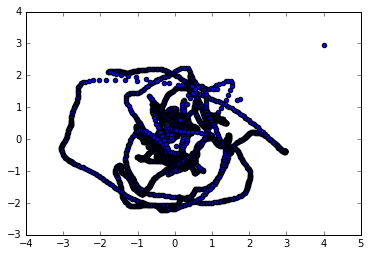

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



plt.scatter(newData[:, 0], newData[:, 1])
plt.show()

This plot is not very helpful in deciding how many clusters should be used, therefore we will proceed analysis this data.
Next we will to hierarchical clustering with a multiple number of clusters and plot the costs per cluster number

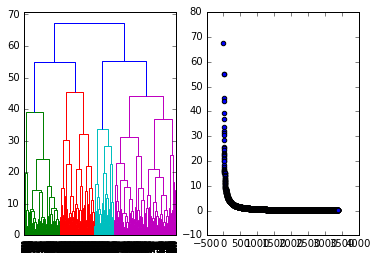

In [9]:
from navipy.preanalysis.preprocessing import get_joining_cost
import scipy.cluster.hierarchy as hac


z = hac.linkage(newData, method='ward')

plt.subplot(121)
dn = hac.dendrogram(z)

plt.subplot(122)
costs, max_nCluster = get_joining_cost(np.array(newData),None)#mytrajart.values[:,0:2]

plt.scatter(range(max_nCluster),costs)

plt.show()

this figure is difficult to read, so lets plot only the first 50 clusters

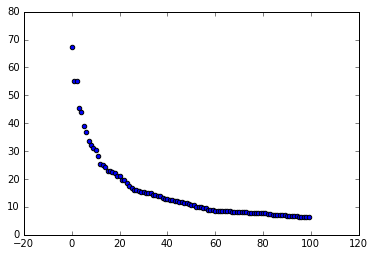

In [10]:
plt.scatter(range(100),costs[0:100])
plt.show()

Here we see that the costs start to decrease slower with around 9 clusters. So lets plot the difference of the costs to see, where the costs change only minorly. We do this for the first 20 clusters, as the costs increase again when having more than 20. Here we use the ward joining cost, which describes the costs of joining two clusters, which is calculated with with the clusters variance.

\begin{equation*}
Var_{p+q}=VAR_p+VAR_q+n_pn_q\frac{(x_p-x_q)^2}{n_p+n_q}
\end{equation*}

where VAR_i is the variance of the i-th cluster n_i is the size of that cluster and x_i is the average point of the cluster.

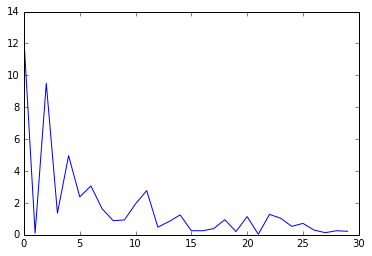

In [11]:
knee = np.abs(np.diff(costs)[0:30])
plt.plot(range(30), knee)

plt.show()

Here we see, that if we use less than 5 clusters, the costs increase significantly. Also we can see that we have a minimum in the change of costs for 11 clusters. When increasing to 12 clusters the costs increase again.

With 15 clusters, we have again a very small change of costs, but as we want the smallest amount of clusters with a small change in costs, we should prefer 12 here. Also its keeps everything more simple.

Luckily for us, does the preanalysis module provide a plotting function that includes all of this already

In [ ]:
from navipy.preanalysis import plotting as anplt


anplt.plot_Data_costs(newData)

So know we have a hint to go with 12 clusters already. 
To cluster the data the k-mean algorithm is used in the preanalysis module. 
But to be sure we will check for other measurements, as the cluster instability and the cluster quality. 
Luckily the plotting part of the preanalysis module also provides a function for this. 

In [ ]:
from navipy.preanalysis import plotting as anplt

anplt.plot_instab_qualities(newData, 30)

In the most upper subplot, the instability values are displayed. The middle one shows the cluster quality, and the lowest the average quality over several k-mean trials with different starting conditions.
We have three lines, because we used 3 different datasets. The blue one is the whole data, for the green line randomly 90% of the data was chosen and for the red line 80%.

In the figure for the instability we can see, that the instability starts to increase with 5 clusters for all dataset.
For the quality, one can see that the quality for the different datasets starts to differ a with about 17 clusters.  The quality is stable with less than 17 clusters. However, here the quality is very low, therefore the results are difficult to interpret. That might be because we are only plotting the measurements for up to 30 clusters. We might get a different impression with more clusters.

So far a overall conclusion seems difficult

Of course it is also possible to individually get the different measures for the data. The preanalysis package provides the cluster quality, a mean cluster quality for multiply runs of the k-mean with different starting points and the instability measure.
The quality of a cluster c_i is simply the squared minimum distance from its centroid to the other clusters' centers divided by the variance of the cluster.

\begin{equation*}
q_c = \frac{min_{c!=g} (d_{cg}^2)}{VAR_{c}}
\end{equation*}

The instability measure is the mean average distance between all clusters. For that multiple k-mean runs are performed with different starting points and the set of cluster centers that has the smallest distance to all other sets of cluster centers is computed. This set is going to be the mean set of clusters centers. Then the average distance from this mean set is calculated to all the centroids of the other run. The resulting quantity is our instability measure.

So if one wishes to get the quality measure the quality function of the preanalysis modul.
It allows the user to choose how much of the data should be used and the range of clusters to be considered.
As one could see earlier, might the numbers of clusters change the impression of the figure. Therefore we will plot again every measure with more clusters. Here with up to 50.

In [ ]:
from navipy.preanalysis.preprocessing import quality


qual = quality(newData, pro=1, max_nCluster=50, min_nCluster=2)

plt.plot(range(2,50),qual)
qual1 = quality(newData, pro=0.9, max_nCluster=50, min_nCluster=2)

plt.plot(range(2,50),qual1)
qual2 = quality(newData, pro=0.8, max_nCluster=50, min_nCluster=2)

plt.plot(range(2,50),qual2)

The same can be done for the mean quality. Here an example with 10 runs for each number of clusters.

In [ ]:
from navipy.preanalysis.preprocessing import meanQuality


meanqual = meanQuality(newData, pro=1, max_nCluster=50, min_nCluster=2, numsets=10)
plt.plot(range(2,50),meanqual)

meanqual2 = meanQuality(newData, pro=0.9, max_nCluster=50, min_nCluster=2, numsets=10)
plt.plot(range(2,50),meanqual2)

meanqual3 = meanQuality(newData, pro=0.8, max_nCluster=50, min_nCluster=2, numsets=10)
plt.plot(range(2,50),meanqual3)

In [ ]:
from navipy.preanalysis.preprocessing import instab
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


instab1 = instab(newData, pro=1, max_nCluster=50, min_nCluster=2, numsets=10)
plt.plot(range(2,50),instab1)

instab2 = instab(newData, pro=0.9, max_nCluster=50, min_nCluster=2, numsets=10)
plt.plot(range(2,50),instab2)

instab3 = instab(newData, pro=0.8, max_nCluster=50, min_nCluster=2, numsets=10)
plt.plot(range(2,50),instab3)

Here we will decide to use 7,8,9,10 clusters. For better understanding, we will plot the lolliplot plots
But first we need to cluster the data with the different cluster sizes. We start with 7

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7).fit(newData)
labels = kmeans.predict(newData)


Generate the colorcode for the lollipop plot

In [ ]:
rgba_vals = []
for i in np.linspace(0,1,4):
    for j in np.linspace(0,1,4):
        for k in np.linspace(0,1,4):
            rgba_vals.append([i,j,k,1])
rgba_vals=[[0,0,0,1], [0,0,1,1],[0,1,0,1],[0,1,1,1],[1,0,0,1],[1,0,1,1],[1,1,0,1]]
print(rgba_vals)

match the colors with the clusters aka data points of the clusters

In [ ]:
import pandas as pd

colors = pd.DataFrame(index=X_std.index, columns=['r','g','b','a'])
for i,l in enumerate(labels):
    colors.loc[X_std.index[i]]=rgba_vals[l]

print(colors.head())

In [ ]:
newtraj=mytraj.loc[X_std.index]
colors = pd.DataFrame(data=colors.values,columns=['r','g','b','a'])
newtraj=Trajectory().from_array(newtraj.values,'zyx')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

newtraj.lollipops(ax=None,colors=colors)
plt.show()

In [ ]:
print(newtraj.head())

In [ ]:
fig=plt.figure(figsize=(10,10))
newtraj.lollipops(ax=fig.gca(),colors=colors, plotcoords=['x','y'], step_lollipop=10, lollipop_tail_length=3)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
print(ax)
newtraj.lollipops(ax=ax[0][0],colors=colors, plotcoords=['x','y'], step_lollipop=10, lollipop_tail_length=3)
newtraj.lollipops(ax=ax[0][1],colors=colors, plotcoords=['x','z'], step_lollipop=10, lollipop_tail_length=3)
newtraj.lollipops(ax=ax[1][0],colors=colors, plotcoords=['y','z'], step_lollipop=10, lollipop_tail_length=3)

In [ ]:
plt.plot(np.diff(np.unwrap(newtraj.alpha_0)))

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(15,10))
print(ax)
newtraj=Trajectory().from_dataframe(mytraj.dropna())
new_vel = newtraj.velocity().loc[X_std.index]
print(len(labels),len(new_vel.index))
ax[0].scatter(new_vel.index, new_vel['dx'],color='b',s=1)
ax[0].scatter(new_vel.index, new_vel['dy'],color='g',s=1)
ax[0].scatter(new_vel.index, new_vel['dz'],color='r',s=1)
ax[0].legend(['dx','dy','dz'])

ax[1].scatter(new_vel.index, new_vel['dalpha_0'],color='b',s=1)
ax[1].scatter(new_vel.index, new_vel['dalpha_1'],color='g',s=1)
ax[1].scatter(new_vel.index, new_vel['dalpha_2'],color='r',s=1)
ax[1].legend(['dyaw','dpitch','droll'])

ax[2].scatter(new_vel.index, labels)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(10,10))
for l in set(labels):
    tmpdf = new_vel.iloc[np.where(labels==l)]
    tmpdf.boxplot(ax=ax[l%2][l%3])

In [5]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9).fit(newData)
labels = kmeans.predict(newData)

In [9]:
df=pd.DataFrame(data=np.column_stack([newData,labels]), columns=['hdx','hdy','hdz','hdyaw','hdpitch','hdroll','label'])
median=df.groupby(['label']).mean()
print(median)

            hdx       hdy       hdz     hdyaw   hdpitch    hdroll
label                                                            
0.0    1.561007 -0.419459 -0.184641 -0.295807  0.838010  0.394656
1.0   -0.561114  1.492782 -0.897616  0.977788  0.643897  0.708279
2.0   -1.211826 -0.914441 -1.532106  0.646577 -0.055856 -0.616949
3.0    0.012685 -0.087830  0.538224 -1.757483  0.554967  0.140480
4.0    0.056875 -0.580565 -0.292908  0.614614 -0.159944  0.629849
5.0    1.025678  0.146271 -0.469393 -0.934376 -1.599668 -0.033359
6.0   -0.075443  0.601838 -0.568146 -0.073064  1.086844 -1.162382
7.0   -0.144997  0.512786  0.784724  0.228560 -0.285487 -0.295681
8.0   -0.850956 -1.552863  1.583911 -0.043641 -0.323036  0.162433


In [28]:
###which scaling??? -median/std or -min/(max-min)

#median_std=(median-median.min())/(median.max()-median.min())
median_std=(median-median.mean())/median.std()

    

In [29]:
print(median_std)

            hdx       hdy       hdz     hdyaw   hdpitch    hdroll
label                                                            
0.0    1.823222 -0.364542 -0.073520 -0.263950  0.931841  0.666611
1.0   -0.622624  1.745265 -0.829771  1.229802  0.693920  1.185727
2.0   -1.372600 -0.910664 -1.502772  0.841337 -0.163756 -1.007824
3.0    0.038707  0.001350  0.693221 -1.978297  0.584920  0.245891
4.0    0.089638 -0.542293 -0.188359  0.803849 -0.291335  1.055907
5.0    1.206230  0.259637 -0.375556 -1.012905 -2.055979 -0.041851
6.0   -0.062864  0.762273 -0.480303 -0.002703  1.236832 -1.910638
7.0   -0.143029  0.664019  0.954682  0.351060 -0.445210 -0.476053
8.0   -0.956681 -1.615046  1.802378  0.031806 -0.491233  0.282229


{0, 1, 2, 3, 4, 5, 6, 7, 8}


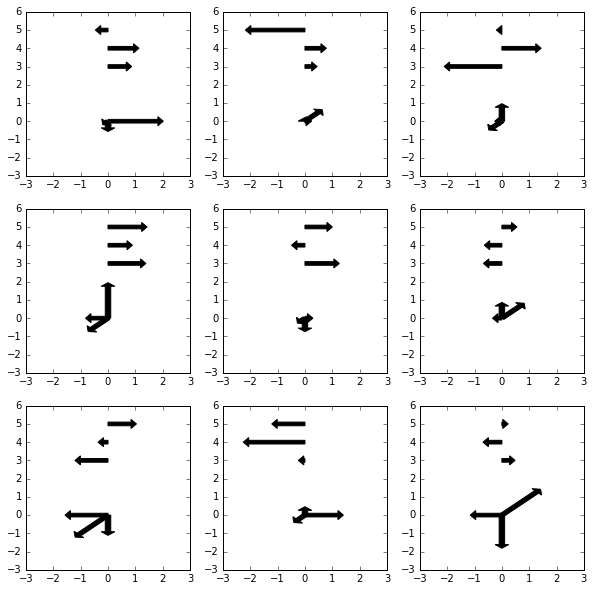

In [52]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math


nrows = len(np.unique(labels))//3
print(set(labels))
if (len(np.unique(labels))/3 - nrows)!=0:
    nrows+=1
scale = 10
fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=(10,10))
for l in set(labels):
    ax[l%nrows][l//3].set_ylim([-3,6])
    ax[l%nrows][l//3].set_xlim([-3,3])
    ax[l%nrows][l//3].arrow(0, 0,median_std['hdx'][l],0,width=0.2,head_width=0.5, head_length=0.2, fc='k', ec='k')
    ax[l%nrows][l//3].arrow(0, 0,0,median_std['hdy'][l],width=0.2,head_width=0.5, head_length=0.2, fc='k', ec='k')
    ax[l%nrows][l//3].arrow(0, 0,median_std['hdz'][l]/math.sqrt(2),median_std['hdz'][l]/math.sqrt(2),width=0.2,head_width=0.5, head_length=0.2, fc='k', ec='k')
    ax[l%nrows][l//3].arrow(0, 5,median_std['hdyaw'][l],0,width=0.2,head_width=0.5, head_length=0.2, fc='k', ec='k')
    ax[l%nrows][l//3].arrow(0, 4,median_std['hdpitch'][l],0,width=0.2,head_width=0.5, head_length=0.2, fc='k', ec='k')
    ax[l%nrows][l//3].arrow(0, 3,median_std['hdroll'][l],0,width=0.2,head_width=0.5, head_length=0.2, fc='k', ec='k')



In [18]:
rgba_vals=[[0,0,0,1], [0,0,1,1],[0,1,0,1],[0,1,1,1],[1,0,0,1],[1,0,1,1],[1,1,0,1],[1,1,1,1],[1,0.5,0,1]]
import pandas as pd

colors = pd.DataFrame(columns=['r','g','b','a'])
for i,l in enumerate(labels):
    colors.loc[X_std.index[i]]=rgba_vals[l]

In [19]:
newtraj=mytraj.loc[colors.index]
colors = pd.DataFrame(data=colors.values,columns=['r','g','b','a'])
newtraj=Trajectory().from_array(newtraj.values,'zyx')

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
print(ax)
newtraj.lollipops(ax=ax[0][0],colors=colors, plotcoords=['x','y'], step_lollipop=10, lollipop_tail_length=3)
newtraj.lollipops(ax=ax[0][1],colors=colors, plotcoords=['x','z'], step_lollipop=10, lollipop_tail_length=3)
newtraj.lollipops(ax=ax[1][0],colors=colors, plotcoords=['y','z'], step_lollipop=10, lollipop_tail_length=3)

(3000, 3500)

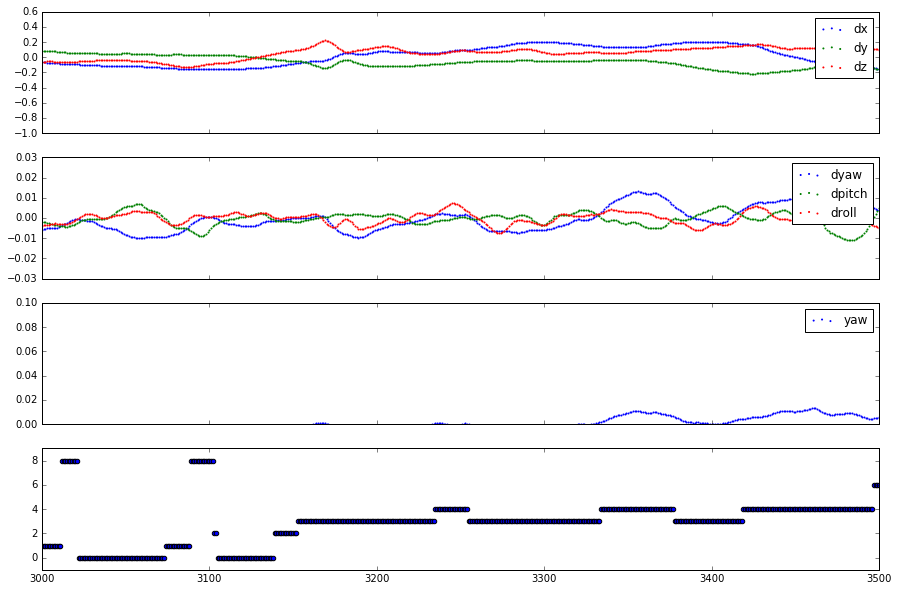

In [25]:
new_vel = transformed.loc[X_std.index]
fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(15,10), sharex=True)
print(ax)
ax[0].scatter(new_vel.index, new_vel['dx'],color='b',s=1)
ax[0].scatter(new_vel.index, new_vel['dy'],color='g',s=1)
ax[0].scatter(new_vel.index, new_vel['dz'],color='r',s=1)
ax[0].legend(['dx','dy','dz'])

ax[1].scatter(new_vel.index, (new_vel['dalpha_2']),color='b',s=1)
ax[1].scatter(new_vel.index, (new_vel['dalpha_1']),color='g',s=1)
ax[1].scatter(new_vel.index, (new_vel['dalpha_0']),color='r',s=1)
ax[1].legend(['dyaw','dpitch','droll'])

ax[2].scatter(X_std.index[1::], (np.diff(np.unwrap(mytraj.loc[X_std.index][('zyx','alpha_0')]))),color='b',s=1)
ax[2].set_ylim([0,0.1])
#ax[2].scatter(mytraj.index, mytraj[('zyx','alpha_1')].diff(),color='g',s=1)
#ax[2].scatter(mytraj.index, mytraj[('zyx','alpha_2')].diff(),color='r',s=1)
ax[2].legend(['yaw'])#,'pitch','roll'])


ax[3].scatter(X_std.index, labels)
plt.xlim([3000,3500])

{0, 1, 2, 3, 4, 5, 6, 7, 8}


/home/luiza/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0 0 0
1 1 0
2 2 0
3 0 1
4 1 1
5 2 1
6 0 2
7 1 2
8 2 2


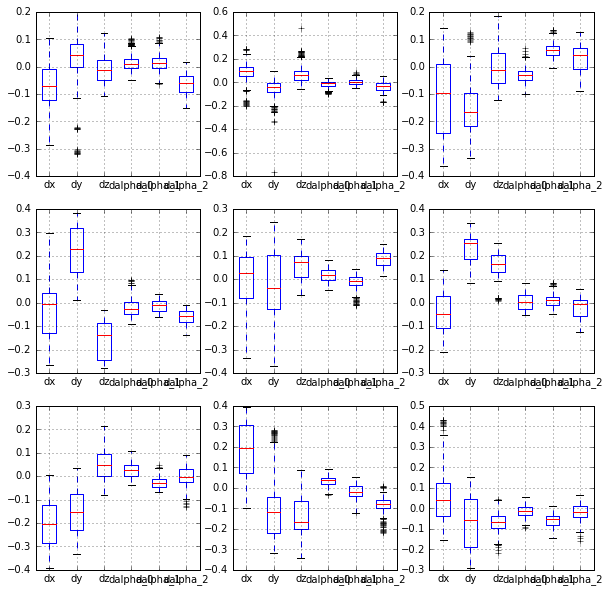

In [26]:
nrows = len(np.unique(labels))//3
print(set(labels))
if (len(np.unique(labels))/3 - nrows)!=0:
    nrows+=1
scale = 10
fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=(10,10))
for l in set(labels):
    tmpdf = new_vel.iloc[np.where(labels==l)]
    tmpdf.dalpha_0*=scale
    tmpdf.dalpha_1*=scale
    tmpdf.dalpha_2*=scale
    print(l,l%nrows,l//3)
    tmpdf.boxplot(ax=ax[l%nrows][l//3])


In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12).fit(newData)
labels = kmeans.predict(newData)

rgba_vals=[[0,0,0,1], [0,0,1,1],[0,1,0,1],[0,1,1,1],[1,0,0,1],[1,0,1,1],[1,1,0,1],[1,1,1,1],[1,0.5,0,1],[0.5,0,1,1],[0.5,0.5,0,1],[1,1,0.5,1]]
import pandas as pd

colors = pd.DataFrame(columns=['r','g','b','a'])
for i,l in enumerate(labels):
    colors.loc[X_std.index[i]]=rgba_vals[l]
    
newtraj=mytraj.iloc[colors.index]
colors = pd.DataFrame(data=colors.values,columns=['r','g','b','a'])
newtraj=Trajectory().from_array(newtraj.values,'zyx')

#fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
#print(ax)
#newtraj.lollipops(ax=ax[0][0],colors=colors, plotcoords=['x','y'], step_lollipop=10, lollipop_tail_length=3)
#newtraj.lollipops(ax=ax[0][1],colors=colors, plotcoords=['x','z'], step_lollipop=10, lollipop_tail_length=3)
#newtraj.lollipops(ax=ax[1][0],colors=colors, plotcoords=['y','z'], step_lollipop=10, lollipop_tail_length=3)

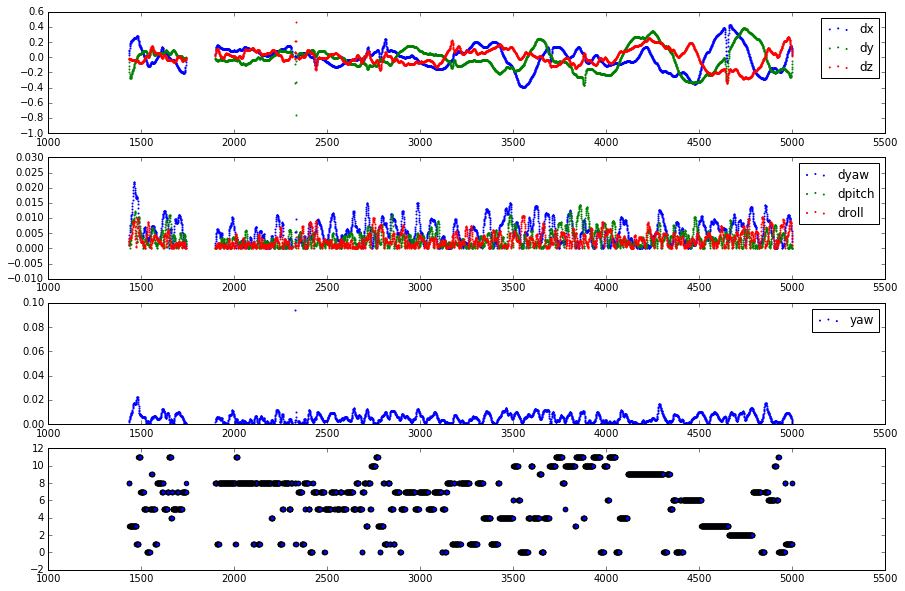

In [16]:
new_vel = transformed.loc[X_std.index]
fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(15,10))
print(ax)
ax[0].scatter(new_vel.index, new_vel['dx'],color='b',s=1)
ax[0].scatter(new_vel.index, new_vel['dy'],color='g',s=1)
ax[0].scatter(new_vel.index, new_vel['dz'],color='r',s=1)
ax[0].legend(['dx','dy','dz'])

ax[1].scatter(new_vel.index, abs(new_vel['dalpha_2']),color='b',s=1)
ax[1].scatter(new_vel.index, abs(new_vel['dalpha_1']),color='g',s=1)
ax[1].scatter(new_vel.index, abs(new_vel['dalpha_0']),color='r',s=1)
ax[1].legend(['dyaw','dpitch','droll'])

ax[2].scatter(X_std.index[1::], abs(np.diff(np.unwrap(mytraj.loc[X_std.index][('zyx','alpha_0')]))),color='b',s=1)
ax[2].set_ylim([0,0.1])
#ax[2].scatter(mytraj.index, mytraj[('zyx','alpha_1')].diff(),color='g',s=1)
#ax[2].scatter(mytraj.index, mytraj[('zyx','alpha_2')].diff(),color='r',s=1)
ax[2].legend(['yaw'])#,'pitch','roll'])


ax[3].scatter(X_std.index, labels)

In [ ]:
tmp=mytraj.loc[X_std.index]
tmp2=np.unwrap(tmp[('zyx','alpha_0')])
plt.plot(np.diff(tmp2))
plt.show()

In [ ]:
nrows = len(np.unique(labels))//3
if (len(np.unique(labels))/3 - nrows)!=0:
    nrows+=1
scale = 10
fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=(10,10))
print(nrows)
for l in set(labels):
    tmpdf = new_vel.iloc[np.where(labels==l)]
    tmpdf.dalpha_0*=scale
    tmpdf.dalpha_1*=scale
    tmpdf.dalpha_2*=scale
    print(l,[l//3],[l%3])
    tmpdf.boxplot(ax=ax[l//3][l%3])

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15).fit(newData)
labels = kmeans.predict(newData)

rgba_vals=[[0,0,0,1], [0,0,1,1],[0,1,0,1],[0,1,1,1],[1,0,0,1],[1,0,1,1],[1,1,0,1],
           [1,1,1,1],[1,0.5,0,1],[0.5,0,1,1],[0.5,0.5,0,1],[1,1,0.5,1],[0,0.5,1,1],[0,0,0.5,1],[1,0.5,1,1]]
import pandas as pd

colors = pd.DataFrame(columns=['r','g','b','a'])
for i,l in enumerate(labels):
    colors.loc[X_std.index[i]]=rgba_vals[l]
    
newtraj=mytraj.iloc[colors.index]
colors = pd.DataFrame(data=colors.values,columns=['r','g','b','a'])
newtraj=Trajectory().from_array(newtraj.values,'zyx')

#fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
#print(ax)
#newtraj.lollipops(ax=ax[0][0],colors=colors, plotcoords=['x','y'], step_lollipop=10, lollipop_tail_length=3)
#newtraj.lollipops(ax=ax[0][1],colors=colors, plotcoords=['x','z'], step_lollipop=10, lollipop_tail_length=3)
#newtraj.lollipops(ax=ax[1][0],colors=colors, plotcoords=['y','z'], step_lollipop=10, lollipop_tail_length=3)

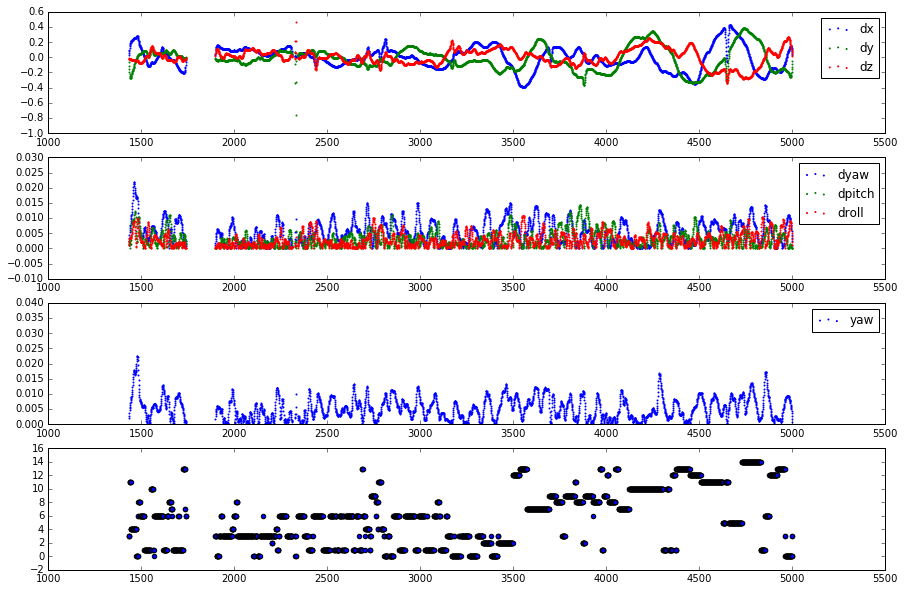

In [14]:
new_vel = transformed.loc[X_std.index]
fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(15,10))
print(ax)
ax[0].scatter(new_vel.index, new_vel['dx'],color='b',s=1)
ax[0].scatter(new_vel.index, new_vel['dy'],color='g',s=1)
ax[0].scatter(new_vel.index, new_vel['dz'],color='r',s=1)
ax[0].legend(['dx','dy','dz'])

ax[1].scatter(new_vel.index, abs(new_vel['dalpha_2']),color='b',s=1)
ax[1].scatter(new_vel.index, abs(new_vel['dalpha_1']),color='g',s=1)
ax[1].scatter(new_vel.index, abs(new_vel['dalpha_0']),color='r',s=1)
ax[1].legend(['dyaw','dpitch','droll'])

ax[2].scatter(X_std.index[1::], abs(np.diff(np.unwrap(mytraj.loc[X_std.index][('zyx','alpha_0')]))),color='b',s=1)
ax[2].set_ylim([0,0.04])
#ax[2].scatter(mytraj.index, mytraj[('zyx','alpha_1')].diff(),color='g',s=1)
#ax[2].scatter(mytraj.index, mytraj[('zyx','alpha_2')].diff(),color='r',s=1)
ax[2].legend(['yaw'])#,'pitch','roll'])


ax[3].scatter(X_std.index, labels)

In [ ]:
nrows = len(np.unique(labels))//3
if (len(np.unique(labels))/3 - nrows)!=0:
    nrows+=1
scale = 10
fig, ax = plt.subplots(nrows=nrows, ncols=3,figsize=(10,10))
for l in set(labels):
    tmpdf = new_vel.iloc[np.where(labels==l)]
    tmpdf.dalpha_0*=scale
    tmpdf.dalpha_1*=scale
    tmpdf.dalpha_2*=scale
    tmpdf.boxplot(ax=ax[l%nrows][l%3])

In [ ]:
plt.plot(np.abs(new_vel['dalpha_0'][4000:5000]))